The dataset is taken from this Kaggle source:

[1]	C. Bisaillon, “Fake and real news dataset,” Kaggle, 26-Mar-2020. Available: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset. 

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 28 23:20:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns


from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

#import natural language specific libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from string import punctuation
import re,string,unicodedata


import nltk
nltk.download('punkt')

#for reproducibility
import random
random.seed(10)
print(random.random())



import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0.5714025946899135


In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#load dataset 
fake= '/content/drive/MyDrive/DS PROJECT/DS PROJECT/archive (7)/Fake.csv'
real= '/content/drive/MyDrive/DS PROJECT/DS PROJECT/archive (7)/True.csv'

fake=pd.read_csv(fake)
real=pd.read_csv(real)

fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1


In [6]:
fake['target']=1
real['target']=0

df=pd.concat([fake,real], axis=0)

df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
df.shape
df.info()
df.isnull().any()
data=df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


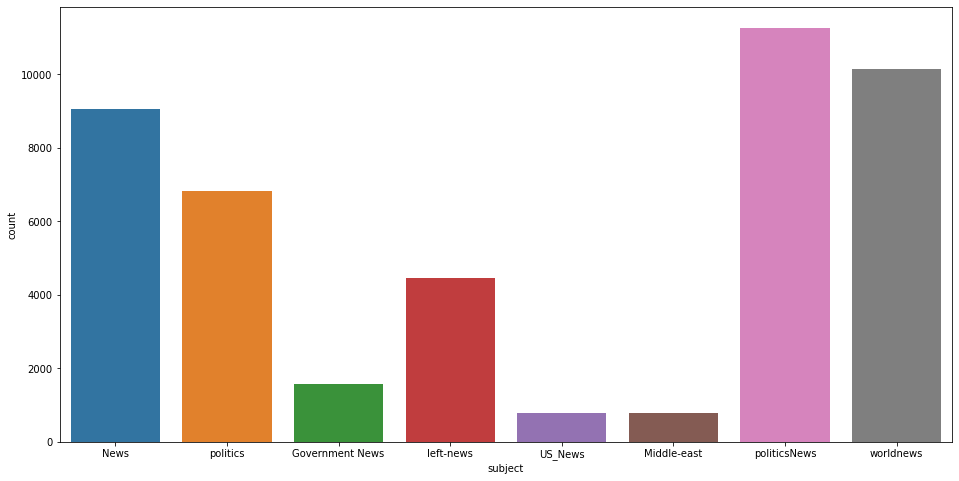

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(data.subject)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


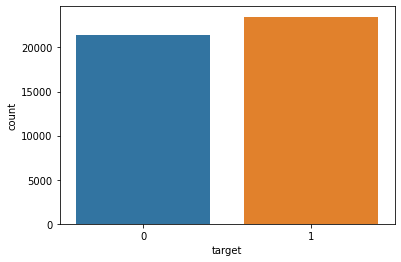

In [9]:
sns.countplot(data.target)

In [10]:
from sklearn.utils import shuffle
data_shuffled=shuffle(data)

data_shuffled

,title,text,subject,date,target
13651,DEMOCRAT GUN GRABBER SIT-IN Rages On With A Da...,Democrats staging a sit-in on the floor of Con...,politics,"Jun 22, 2016",1
7895,Transcript of Trump video statement in respons...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,08-Oct-16,0
19545,DID HILLARY Just Lose Her “Get Out Of Jail Fre...,A senior Donald Trump adviser is calling Hilla...,left-news,"Nov 27, 2016",1
16298,Hamas says its security chief wounded in Gaza ...,GAZA (Reuters) - Hamas security chief in the ...,worldnews,27-Oct-17,0
11419,HOME DEPOT CO-FOUNDER ON TRUMP: “This guy has ...,,politics,"Mar 13, 2017",1
...,...,...,...,...,...
888,Trump Supporter Pleads Guilty To Tampering Wi...,"At the close of the election, upon finding out...",News,"July 10, 2017",1
1744,"Pence On Aircraft Carrier Lie: No, It Wasn’t ...",The White House led people to believe that a U...,News,"April 19, 2017",1
13631,OBAMA’S NEW AND “IMPROVED” FBI Offers HUGE Rew...,No evidence No worries Obama s got this one. M...,politics,"Jun 25, 2016",1
9246,Trump criticizes GM for Mexico investments,(Reuters) - Republican presidential candidate ...,politicsNews,07-Jun-16,0


In [11]:
#preprocess

import nltk
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))


from nltk.tokenize import word_tokenize

punctuations = list(string.punctuation)
lemma = WordNetLemmatizer() 

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#dropdate
#subject,text,title%
data_shuffled ['total']= data_shuffled['title']+' '+data_shuffled['text']

In [13]:
#import natural language specific libraries


def clean_text(text):
    text=re.sub("[^a-zA-Z]"," ",text) 
    text=re.sub('<.*?>', ' ', text)  
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    text=text.lower() 
    tokens=word_tokenize(text) 
    tokens=[token for token in tokens if token not in stop_words and token not in punctuations] 
    tokens=[lemma.lemmatize(token) for token in tokens] 
    text=" ".join(tokens)
    return text



In [14]:
data_shuffled['total'] = data_shuffled['total'].apply(lambda x : clean_text(x))


In [15]:
data_shuffled['total']

13651    democrat gun grabber sit rage damned ironic fe...
7895     transcript trump video statement response lewd...
19545    hillary lose get jail free card senior trump a...
16298    hamas say security chief wounded gaza car bomb...
11419    home depot co founder trump guy gut got great ...
                               ...                        
888      trump supporter pleads guilty tampering electi...
1744     penny aircraft carrier lie strategy moron whit...
13631    obama new improved fbi offer huge reward anyon...
9246     trump criticizes gm mexico investment reuters ...
3697     trump defender white house turmoil politics us...
Name: total, Length: 44898, dtype: object

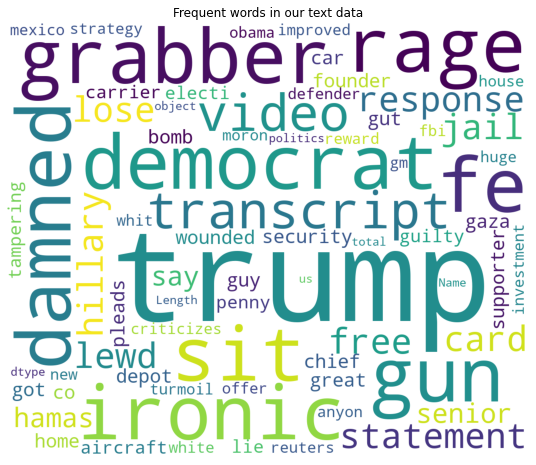

In [16]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(str(data_shuffled['total']))

plt.figure( figsize=(16,8) )
plt.imshow(wordcloud)
plt.title('Frequent words in our text data')
plt.axis('off')
plt.show()

In [17]:
X = data_shuffled['total'][:25000]
y = data_shuffled['target'][:25000]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

vec_train = vectorizer.fit_transform(X_train)
vec_train = vec_train.toarray()
vec_test = vectorizer.transform(X_test).toarray()

In [20]:
train_data = pd.DataFrame(vec_train , columns=vectorizer.get_feature_names_out())
test_data = pd.DataFrame(vec_test , columns= vectorizer.get_feature_names_out())

In [21]:
train_data

,aa,aadhaar,aapl,aaron,aarp,ab,aba,abaaoud,ababa,abadi,...,zoo,zor,zor city,zor province,zucker,zuckerberg,zuckerberg said,zuma,zurich,zurich reuters
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.032815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DECISION TREE

In [36]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [37]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.003
R-squared score is 0.9879704052722346


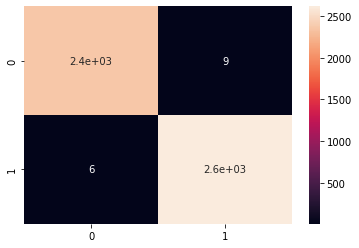

In [38]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [39]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.997

In [40]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.9965740388275599

In [41]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.9977134146341463

In [42]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.9971434012569034

LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [23]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.0162
R-squared score is 0.9351534245956816


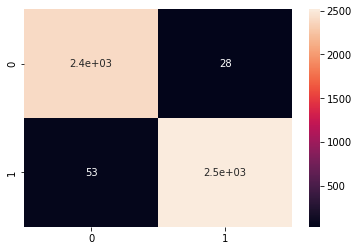

In [24]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [25]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9838

In [26]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.988985051140834

In [27]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.9793533307362681

In [28]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.9841456253669995

NAIVE BAYES

In [29]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(train_data,y_train)
y_pred=model.predict(test_data)

In [30]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.0356
R-squared score is 0.8574976491114978


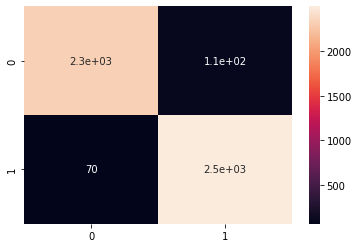

In [31]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [32]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9644

In [33]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.9585412667946257

In [34]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.9727308141799766

In [35]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.965583913379737

RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(train_data,y_train)
y_pred=model.predict(test_data)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)

print('the model performance')
print('----------------------')
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

the model performance
----------------------
MSE is 0.0072
R-squared score is 0.9711792998203029


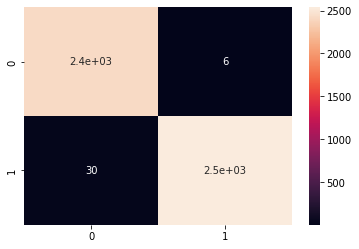

In [38]:
#evaluate performance
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf=confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True)

In [39]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9928

In [40]:
#precision score
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
precision

0.9976405819897759

In [41]:
#recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
recall

0.9883132060771328

In [42]:
#f1 score
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred)
f1

0.9929549902152642

BERT

The following code is used as reference for this model implementation.

citation:

[20]	Saumyab271, “Text classification using Bert and tensorflow,” Analytics Vidhya, 31-Dec-2021. Available: https://www.analyticsvidhya.com/blog/2021/12/text-classification-using-bert-and-tensorflow/. 

In [43]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 12.1 MB/s 
     |████████████████████████████████| 462 kB 61.8 MB/s 


In [44]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [45]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [46]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m ])
history=model.fit(X_train, y_train, epochs=30, batch_size = 32, validation_data=(X_train,y_train))

Epoch 1/30
625/625 [==============================] - 300s 458ms/step - loss: 0.4699 - accuracy: 0.8078 - f1_m: 0.8156 - precision_m: 0.8132 - recall_m: 0.8365 - val_loss: 0.3624 - val_accuracy: 0.8691 - val_f1_m: 0.8695 - val_precision_m: 0.8900 - val_recall_m: 0.8567
Epoch 2/30
625/625 [==============================] - 284s 455ms/step - loss: 0.3464 - accuracy: 0.8587 - f1_m: 0.8605 - precision_m: 0.8675 - recall_m: 0.8639 - val_loss: 0.3187 - val_accuracy: 0.8701 - val_f1_m: 0.8773 - val_precision_m: 0.8513 - val_recall_m: 0.9114
Epoch 3/30
625/625 [==============================] - 284s 454ms/step - loss: 0.3160 - accuracy: 0.8683 - f1_m: 0.8710 - precision_m: 0.8757 - recall_m: 0.8737 - val_loss: 0.2937 - val_accuracy: 0.8798 - val_f1_m: 0.8837 - val_precision_m: 0.8785 - val_recall_m: 0.8952
Epoch 4/30
625/625 [==============================] - 284s 454ms/step - loss: 0.3020 - accuracy: 0.8719 - f1_m: 0.8739 - precision_m: 0.8796 - recall_m: 0.8761 - val_loss: 0.2822 - val_accur

In [48]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

[0.9960467  0.9971961  0.995044   ... 0.9126125  0.09022932 0.07725145]


In [49]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)

157/157 [==============================] - 37s 228ms/step - loss: 0.2258 - accuracy: 0.9066 - f1_m: 0.9039 - precision_m: 0.9337 - recall_m: 0.8818


In [50]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,f1_m,precision_m,recall_m,val_loss,val_accuracy,val_f1_m,val_precision_m,val_recall_m,epoch
25,0.249962,0.89380,0.895171,0.900200,0.896360,0.222372,0.91170,0.912316,0.927751,0.902480,25
26,0.252818,0.89470,0.896333,0.902552,0.896750,0.223359,0.91035,0.913512,0.903406,0.928987,26
27,0.249803,0.89470,0.895468,0.901944,0.895595,0.225083,0.90765,0.911900,0.893964,0.935647,27
28,0.250525,0.89595,0.897791,0.901778,0.899773,0.221208,0.91095,0.913842,0.905124,0.928001,28
29,0.248452,0.89630,0.897545,0.901777,0.899884,0.226509,0.90580,0.904084,0.940436,0.875784,29


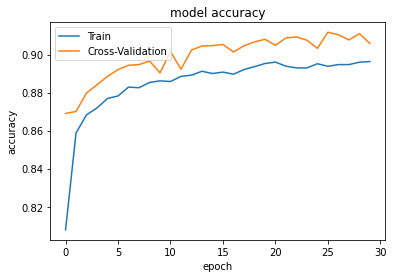

In [51]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

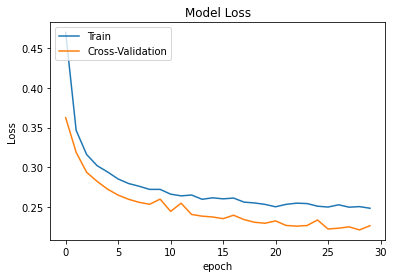

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [53]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [54]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))

the model performance
------------------------------
MSE is 0.06772073518768518
MAE is 0.1488568351113805
RMSE is 0.26023207947462046


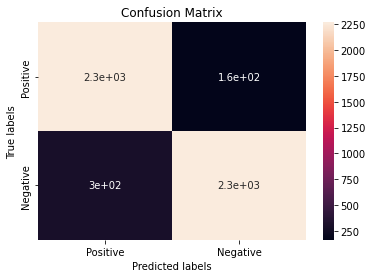

In [55]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(X_test)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [56]:
train_data,y_train=np.asarray(train_data),np.asarray(y_train)
test_data,y_test=np.asarray(test_data),np.asarray(y_test)

In [57]:
print(train_data.shape) 
print(test_data.shape) 
print(y_train.shape) 
print(y_test.shape) 

(20000, 50000)
(5000, 50000)
(20000,)
(5000,)


MLP

In [58]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import binary_crossentropy

In [59]:
max_words=50000
EPOCHS = 5
batch_size = 16 

In [60]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [61]:
model = Sequential()
   
model.add(Dense(50,input_shape=(max_words,),activation='relu'))
model.add(Dropout(0.2))
    
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
    
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.4))
    
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',f1_m,precision_m, recall_m])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2500050   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               3

In [62]:
history = model.fit(train_data, y_train,epochs=30,validation_data = (train_data, y_train))


Epoch 1/30
625/625 [==============================] - 12s 17ms/step - loss: 0.0913 - accuracy: 0.9700 - f1_m: 0.9710 - precision_m: 0.9730 - recall_m: 0.9737 - val_loss: 0.0021 - val_accuracy: 0.9998 - val_f1_m: 0.9998 - val_precision_m: 0.9998 - val_recall_m: 0.9998
Epoch 2/30
625/625 [==============================] - 6s 9ms/step - loss: 0.0030 - accuracy: 0.9994 - f1_m: 0.9994 - precision_m: 0.9994 - recall_m: 0.9995 - val_loss: 4.9513e-05 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 3/30
625/625 [==============================] - 6s 9ms/step - loss: 3.5247e-04 - accuracy: 0.9999 - f1_m: 0.9999 - precision_m: 0.9999 - recall_m: 0.9999 - val_loss: 5.1083e-05 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 4/30
625/625 [==============================] - 6s 9ms/step - loss: 1.5066e-04 - accuracy: 0.9999 - f1_m: 0.9999 - precision_m: 0.9999 - recall_m: 0.9999 - val_loss: 5.4057e-07 - val

In [63]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,f1_m,precision_m,recall_m,val_loss,val_accuracy,val_f1_m,val_precision_m,val_recall_m,epoch
25,2.814791e-09,1.00000,1.000000,1.000000,1.000000,3.466109e-13,1.00000,1.000000,1.000000,1.000000,25
26,9.619339e-09,1.00000,1.000000,1.000000,1.000000,3.721170e-13,1.00000,1.000000,1.000000,1.000000,26
27,5.942015e-03,0.99925,0.999226,0.999189,0.999328,4.030257e-03,0.99885,0.998936,0.998110,0.999822,27
28,3.889916e-03,0.99915,0.999188,0.999228,0.999198,9.773147e-05,0.99995,0.999957,0.999916,1.000000,28
29,9.178453e-04,0.99970,0.999691,0.999615,0.999786,8.522004e-06,1.00000,1.000000,1.000000,1.000000,29


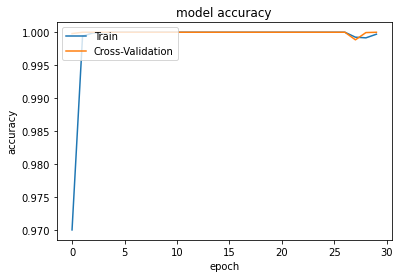

In [64]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

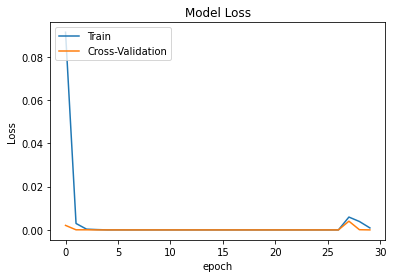

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [66]:
y_pred=model.predict(test_data)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [67]:
print('the model performance')
print('------------------------------')
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))

the model performance
------------------------------
MSE is 0.010864598382365757
MAE is 0.012685569564359072
RMSE is 0.10423338420278676


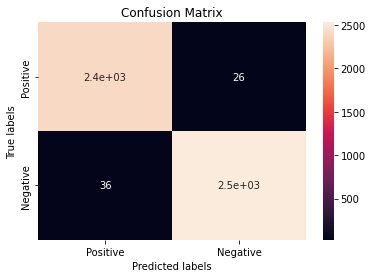

In [68]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(y_test, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);